In [4]:
import numpy as np
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# 予測結果の精度確認（ROC曲線の描画）
from sklearn.metrics import roc_auc_score, roc_curve
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt

In [5]:
import torch
# 自動微分の関数 
from torch.autograd import Variable
# ニューラルネットワークの関数
import torch.nn as nn
# 活性化関数
import torch.nn.functional as F
# 最適化のアルゴリズムの関数
import torch.optim as optim
#ユーティリティのデータから
from torch.utils.data import DataLoader ,TensorDataset

In [ ]:
def MedcDataChange(df_x):
    aaa
    
    
    

In [ ]:
class MedcDataset():
    def __init__():
        super().__init__()
        
        # CSVファイル読み込み（訓練データ）
        df = pd.read_csv('train.csv')
        
        df_x = df.drop(['disease'], axis=1)
        df_y = df['disease']
    

## 訓練データの読み込み

In [205]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [206]:
# 性別を変換する（訓練データ）
# gemder=pd.get_dummies(df_train.loc[:,['Gender']])
# df_train['Female']=gemder.loc[:,['Gender_Female']]
# df_train['Male']=gemder.loc[:,['Gender_Male']]
df_train.drop(columns=['Gender'],inplace=True)
df_train.drop(columns=['Age'],inplace=True)
df_train.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [207]:
df_train.describe()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706
std,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226
min,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000
25%,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000
50%,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000
75%,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000
max,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.016970,1.821496,1.000000


In [208]:
sigma=df_train.std()
print(sigma)
print('   ')
print(sigma*3)
print('   ')
print(sigma['TP'])

T_Bil         2.443585
D_Bil         1.569032
ALP         200.348515
ALT_GPT     145.927366
AST_GOT     110.125390
TP            0.840664
Alb           0.559942
AG_ratio      0.227237
disease       0.497226
dtype: float64
   
T_Bil         7.330755
D_Bil         4.707096
ALP         601.045545
ALT_GPT     437.782098
AST_GOT     330.376170
TP            2.521992
Alb           1.679825
AG_ratio      0.681712
disease       1.491677
dtype: float64
   
0.8406638990699148


In [209]:
df_desc = df_train.describe()
print(df_desc.loc['25%','T_Bil'])

0.7812584352498221


# 評価データの読み込み

In [210]:
# CSVファイル読み込み（評価データ）
df_vat = pd.read_csv('test.csv')
df_vat.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [211]:
# 性別を変換する（検証データ）
# gemder=pd.get_dummies(df_vat.loc[:,['Gender']])
# df_vat['Female']=gemder.loc[:,['Gender_Female']]
# df_vat['Male']=gemder.loc[:,['Gender_Male']]
df_vat.drop(columns=['Gender'],inplace=True)
df_vat.drop(columns=['Age'],inplace=True)
df_vat.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


## データを加工する

In [212]:
# 特徴量選択
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
# 多項式・交互作用特徴量
from sklearn.preprocessing import PolynomialFeatures


#### 訓練データのデータ加工前処理

In [213]:
# 説明変数（訓練データ）
#x_tmp=xConv(df_train.loc[:,['Age', 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio', 'Female', 'Male']])
#x_tmp=xConv(df_train.loc[:,['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']])
#x_tmp=xConv(df_train.loc[:,['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT']])
x_tmp=df_train.loc[:,['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']]

In [214]:
col='T_Bil'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='D_Bil'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat


col='ALP'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat


col='ALT_GPT'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat


col='AST_GOT'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

In [215]:
col='T_Bil'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='D_Bil'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='ALP'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='ALT_GPT'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='AST_GOT'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='TP'
maxval=df_desc.loc['max',col]
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='Alb'
maxval=df_desc.loc['max',col]
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='AG_ratio'
maxval=df_desc.loc['max',col]
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

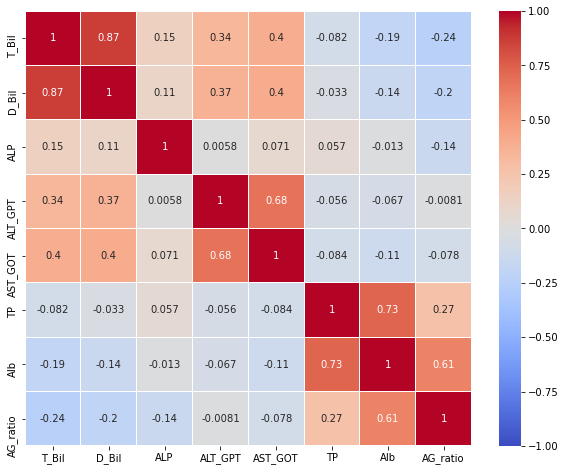

In [216]:
# seabornライブラリをsnsという省略名でインポート
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(x_tmp.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


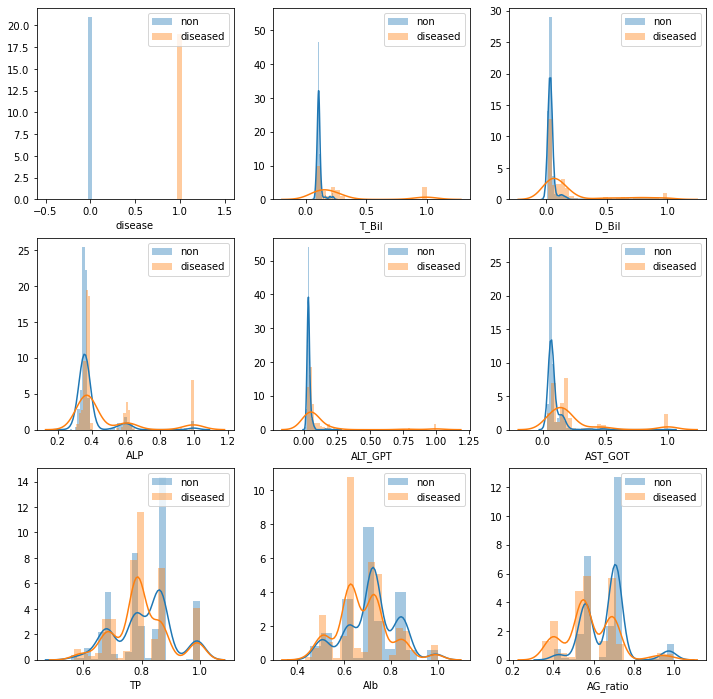

In [217]:

#グラフの表示
plt.figure(figsize=(12, 12))
# disease列とdf_numericを結合
df_csatt = pd.concat([df_train["disease"], x_tmp], axis=1)


for ncol, colname in enumerate(df_csatt.columns):
    plt.subplot(3, 3, ncol+1)
    sns.distplot(df_csatt.query("disease==0")[colname])
    sns.distplot(df_csatt.query("disease==1")[colname])
    plt.legend(labels=["non", "diseased"], loc='upper right')
plt.show()

In [218]:
x_tmp.describe()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,0.197239,0.109233,0.424238,0.071275,0.156462,0.804702,0.701112,0.628368
std,0.227871,0.197602,0.158909,0.142658,0.192032,0.096197,0.111610,0.124753
min,0.079932,0.007406,0.271630,0.008965,0.034153,0.555977,0.434701,0.344295
25%,0.106573,0.030781,0.356032,0.031168,0.064288,0.770181,0.625707,0.551451
50%,0.113984,0.041233,0.366183,0.038005,0.081895,0.791347,0.721818,0.661553
75%,0.163252,0.071264,0.381761,0.052666,0.170901,0.862358,0.739993,0.707045
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
print(x_tmp.shape)

(850, 8)


In [220]:
# 目的変数（訓練データ）
y_train = np.array(df_train.loc[:,['disease']])

# 組み込み法に使うモデルの指定
fs_model = LogisticRegression(penalty='l2', random_state=0)
# 閾値の指定
fs_threshold = "mean"
# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model, threshold=fs_threshold)

# 特徴量生成
polynomial = PolynomialFeatures(degree=3, include_bias=False)
polynomial_arr = polynomial.fit_transform(np.array(x_tmp))
# polynomial_arrのデータフレーム化 （※カラムはshape[1]でpolynomial_arrの列数分だけ出力）
X_polynomial = pd.DataFrame(polynomial_arr, columns=["poly" + str(x_) for x_ in range(polynomial_arr.shape[1])])

# 特徴量選択の実行
selector.fit(X_polynomial, y_train)
mask = selector.get_support()

# 選択された特徴量だけのサンプル取得
X_polynomial_masked = X_polynomial.loc[:, mask]

x_train = np.array(X_polynomial_masked)




C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [221]:
X_polynomial.describe()

,poly0,poly1,poly2,poly3,poly4,poly5,poly6,poly7,poly8,poly9,...,poly154,poly155,poly156,poly157,poly158,poly159,poly160,poly161,poly162,poly163
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,...,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,0.197239,0.109233,0.424238,0.071275,0.156462,0.804702,0.701112,0.628368,0.090768,0.060672,...,0.543441,0.473006,0.417783,0.416533,0.368409,0.334202,0.370991,0.328677,0.298652,0.278196
std,0.227871,0.197602,0.158909,0.142658,0.192032,0.096197,0.111610,0.124753,0.250145,0.189902,...,0.193045,0.173172,0.142143,0.170105,0.144359,0.147933,0.176359,0.154606,0.157080,0.175229
min,0.079932,0.007406,0.271630,0.008965,0.034153,0.555977,0.434701,0.344295,0.006389,0.000682,...,0.171858,0.150879,0.129825,0.123630,0.106379,0.081822,0.082144,0.071795,0.062303,0.040813
25%,0.106573,0.030781,0.356032,0.031168,0.064288,0.770181,0.625707,0.551451,0.011358,0.003396,...,0.456855,0.367345,0.319862,0.297741,0.264717,0.228205,0.244970,0.217826,0.194563,0.167695
50%,0.113984,0.041233,0.366183,0.038005,0.081895,0.791347,0.721818,0.661553,0.012992,0.004683,...,0.495565,0.451533,0.416174,0.415089,0.351579,0.321723,0.376082,0.300013,0.278717,0.289531
75%,0.163252,0.071264,0.381761,0.052666,0.170901,0.862358,0.739993,0.707045,0.026656,0.012010,...,0.641303,0.539128,0.523415,0.467349,0.440295,0.427186,0.405213,0.381021,0.365076,0.353461
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.996298,0.986333,0.998147,0.989306,0.987431,1.000000,0.992288,0.990407,1.000000


In [222]:
X_polynomial_masked.describe()

,poly0,poly1,poly3,poly4,poly7,poly8,poly10,poly13,poly14,poly15,...,poly148,poly149,poly150,poly151,poly152,poly153,poly156,poly158,poly159,poly163
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,...,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,0.197239,0.109233,0.071275,0.156462,0.628368,0.090768,0.089129,0.156923,0.133550,0.116995,...,0.100229,0.086435,0.077154,0.075398,0.067415,0.061909,0.417783,0.368409,0.334202,0.278196
std,0.227871,0.197602,0.142658,0.192032,0.124753,0.250145,0.130416,0.179473,0.144677,0.122089,...,0.124450,0.106883,0.099807,0.094276,0.088440,0.087480,0.142143,0.144359,0.147933,0.175229
min,0.079932,0.007406,0.008965,0.034153,0.344295,0.006389,0.028081,0.055141,0.038117,0.033315,...,0.017240,0.014326,0.014014,0.011068,0.011400,0.008587,0.129825,0.106379,0.081822,0.040813
25%,0.106573,0.030781,0.031168,0.064288,0.551451,0.011358,0.038558,0.084496,0.074272,0.063905,...,0.043197,0.037577,0.034655,0.032124,0.030052,0.026144,0.319862,0.264717,0.228205,0.167695
50%,0.113984,0.041233,0.038005,0.081895,0.661553,0.012992,0.042604,0.094666,0.083075,0.077017,...,0.054318,0.049780,0.043688,0.044965,0.037926,0.033700,0.416174,0.351579,0.321723,0.289531
75%,0.163252,0.071264,0.052666,0.170901,0.707045,0.026656,0.080379,0.128823,0.117773,0.106335,...,0.111577,0.092611,0.077836,0.077807,0.068193,0.063140,0.523415,0.440295,0.427186,0.353461
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988596,0.740053,0.696701,...,0.975810,0.980637,0.901634,0.996611,0.916321,0.874517,0.986333,0.989306,0.987431,1.000000


In [223]:
X_polynomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Columns: 164 entries, poly0 to poly163
dtypes: float64(164)
memory usage: 1.1 MB


In [224]:
X_polynomial_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 58 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   poly0    850 non-null    float64
 1   poly1    850 non-null    float64
 2   poly3    850 non-null    float64
 3   poly4    850 non-null    float64
 4   poly7    850 non-null    float64
 5   poly8    850 non-null    float64
 6   poly10   850 non-null    float64
 7   poly13   850 non-null    float64
 8   poly14   850 non-null    float64
 9   poly15   850 non-null    float64
 10  poly17   850 non-null    float64
 11  poly20   850 non-null    float64
 12  poly21   850 non-null    float64
 13  poly22   850 non-null    float64
 14  poly24   850 non-null    float64
 15  poly31   850 non-null    float64
 16  poly32   850 non-null    float64
 17  poly33   850 non-null    float64
 18  poly35   850 non-null    float64
 19  poly36   850 non-null    float64
 20  poly37   850 non-null    float64
 21  poly40   850 non

#### 評価データのデータ加工前処理

In [225]:
# 説明変数（評価データ）
#x_tmp=xConv(df_vat)
x_tmp=df_vat

In [226]:
col='T_Bil'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='D_Bil'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='ALP'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='ALT_GPT'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat

col='AST_GOT'
std=sigma[col]*3
vat=df_desc.loc['75%',col]*3
x_tmp.loc[x_tmp[col]>(std),col]=std
#x_tmp.loc[x_tmp[col]>(std),col]=vat


In [227]:
col='T_Bil'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='D_Bil'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='ALP'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='ALT_GPT'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='AST_GOT'
maxval=sigma[col]*3
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='TP'
maxval=df_desc.loc['max',col]
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='Alb'
maxval=df_desc.loc['max',col]
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

col='AG_ratio'
maxval=df_desc.loc['max',col]
x_tmp.loc[:,col]=x_tmp.loc[:,col]/maxval

In [228]:

# 組み込み法に使うモデルの指定
fs_model = LogisticRegression(penalty='l2', random_state=0)
# 閾値の指定
fs_threshold = "mean"
# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model, threshold=fs_threshold)

# 特徴量生成
polynomial = PolynomialFeatures(degree=3, include_bias=False)
polynomial_arr = polynomial.fit_transform(x_tmp)
# polynomial_arrのデータフレーム化 （※カラムはshape[1]でpolynomial_arrの列数分だけ出力）
X_polynomial = pd.DataFrame(polynomial_arr, columns=["poly" + str(x) for x in range(polynomial_arr.shape[1])])

# 選択された特徴量だけのサンプル取得
X_polynomial_masked = X_polynomial.loc[:, mask]

x_vat = np.array(X_polynomial_masked)


In [229]:
# yの変換
#y = np.zeros((len(y_train), 1 + y_train.max()), dtype=int)
#y[np.arange(len(y_train)), y_train.T] = 1
#y_train = y
# 分割
X_train,X_test,Y_train,Y_test=train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

In [230]:
# 標準化
from sklearn.preprocessing import StandardScaler,MinMaxScaler
xc = StandardScaler() 
#norm = MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_vat=sc.transform(x_vat)

In [231]:
# numpy の値を torch の値に変換する
X_train = torch.from_numpy(X_train).float()
Y_train = torch.from_numpy(Y_train).float()
X_test = torch.from_numpy(X_test).float()
Y_test = torch.from_numpy(Y_test).float()
X_vat  = torch.from_numpy(x_vat).float()

In [232]:
# 行数、列数の確認
in_size=X_train.shape[1]
reccnt=X_train.shape[0]
print(X_train.shape)
print(X_test.shape)


torch.Size([637, 58])
torch.Size([213, 58])


In [233]:
out_size=Y_train.shape[1]
Y_train.shape

torch.Size([637, 1])

In [234]:
print(X_vat.shape)


torch.Size([350, 58])


In [235]:
# x と y の値をひとつの変数に格納する
train = TensorDataset(X_train ,Y_train)

In [236]:
batchsize=50

# batch_size ：学習する時にまとめるデータ数
# shuffle    : データをランダムに並び替える場合はTrue
#train_loader = DataLoader(train ,batch_size=30, shuffle=True, num_workers=2)
train_loader = DataLoader(train ,batch_size=batchsize, shuffle=True)

In [250]:
node1=60
node2=20


# Module を継承して、Netクラスを作成する
#  ノード数や階層を増やす　⇒　精度が向上する、学習のパフォーマンスは落ちる
#  ノード数や階層を減らす　⇒　精度が下がる、学習のパフォーマンスは上がる
#   　ノードや階層を変更しても精度が上がらない　⇒　入力データが不足している
class Net(nn.Module):
    # 初期化の関数
    def __init__(self):
        super(Net ,self).__init__()
        # ドロップアウト
        p=0.5
        self.dropout1 = nn.Dropout(p)
        self.dropout2 = nn.Dropout(p)
        # 全結合層
        self.fc1 = nn.Linear(in_size , node1)         # nn.Linear (入力のノード数 , 中間層ノード数)
        self.fc2 = nn.Linear(node1 , node2)           # nn.Linear (中間層ノード数 , 中間層ノード数)
        self.fc3 = nn.Linear(node2,  out_size)        # nn.Linear (中間層ノード数 , 出力のノード数)
    
    # ネットワークを通して、出力値を求める関数
    def forward(self ,x):
#        x = torch.relu(self.fc1(x))              # 入力のノードを中間層（１階層目）に渡して結果を得る
#        x = F.sigmoid(self.fc2(x))               # 中間層（１階層目）を中間層（２階層目）に渡して結果を得る
        x = torch.sigmoid (self.fc1(x))           # 入力のノードを中間層（１階層目）に渡して結果を得る
        x = self.dropout1(x)
        x = torch.sigmoid(self.fc2(x))           # 中間層（１階層目）を中間層（２階層目）に渡して結果を得る
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))           # 中間層（２階層目）の結果を出力層に渡す
        return x

In [251]:
# モデルの定義
model = Net()
# 損失の定義 (平均二乗誤差)
#criterion = nn.MSELoss()
# 損失の定義 (平均二乗誤差)
criterion = nn.BCELoss()
# 損失の定義 (交差エントロピー誤差関数)
#criterion = nn.CrossEntropyLoss()

In [252]:
# 最適化のアルゴリズムの選択　（Adam：Stochastic Gradient Descent）
## model.parameters  調整する値
## lr(learning rate) ：学習率　どれぐらいの幅でパラメータを更新していくのか
optimizer = optim.Adam(model.parameters() , lr=0.01)
#optimizer = optim.SGD(model.parameters() , lr=0.01)

In [253]:
import math

loss_list = []
loss_temp = 0
logdisp=50
accuracy_list = []

correct_counter = 0
acccnt=reccnt*logdisp
epochs=1000


# トレーニングの回数分ループする。
for epoch in range(epochs):
    # 損失を初期化　
    total_loss = 0
    
    for x_train , y_train in train_loader:

        # 出力を計算する 
        output = model(x_train)
        # 損失の計算 (出力の結果；output と 正解：y_trainを渡す)
        loss = criterion(output ,y_train)

        correct_temp = (y_train == output.round()).sum()
        correct_counter += correct_temp

        # パラメータの勾配を初期化する
        optimizer.zero_grad()
        # ロスを伝播する
        loss.backward()
        # パラメータを更新する
        optimizer.step()

        # トータルロスを格納
        total_loss += loss.item()
    
    
    # 10回毎に回数とトータルロスを表示する
    if (epoch+1)%logdisp == 0:
        loss_tmp=total_loss/acccnt
        print(f'Epoch\t{epoch+1}\t\tLoss\t{loss_tmp:.8f}\t\taccuracy:\t{(correct_counter*100)/acccnt:.3f}%')
        
        accuracy_list.append(correct_counter.item()*100/(acccnt))
        loss_list.append(loss_tmp)
        loss_temp=0
        total_loss=0
        correct_counter = 0
        

Epoch	50		Loss	0.00015061		accuracy:	83.000%
Epoch	100		Loss	0.00014033		accuracy:	84.000%
Epoch	150		Loss	0.00013832		accuracy:	84.000%
Epoch	200		Loss	0.00013806		accuracy:	85.000%
Epoch	250		Loss	0.00013445		accuracy:	85.000%
Epoch	300		Loss	0.00012358		accuracy:	85.000%
Epoch	350		Loss	0.00011094		accuracy:	85.000%
Epoch	400		Loss	0.00010685		accuracy:	85.000%
Epoch	450		Loss	0.00011050		accuracy:	86.000%
Epoch	500		Loss	0.00011010		accuracy:	86.000%
Epoch	550		Loss	0.00011207		accuracy:	86.000%
Epoch	600		Loss	0.00012707		accuracy:	86.000%
Epoch	650		Loss	0.00010820		accuracy:	86.000%
Epoch	700		Loss	0.00010578		accuracy:	86.000%
Epoch	750		Loss	0.00010734		accuracy:	86.000%
Epoch	800		Loss	0.00010520		accuracy:	87.000%
Epoch	850		Loss	0.00010347		accuracy:	87.000%
Epoch	900		Loss	0.00010512		accuracy:	87.000%
Epoch	950		Loss	0.00011231		accuracy:	87.000%
Epoch	1000		Loss	0.00010398		accuracy:	87.000%


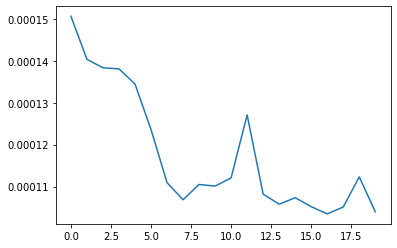

In [254]:
# ロスのプロット
plt.plot(loss_list)

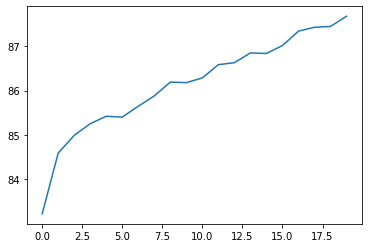

In [255]:
plt.plot(accuracy_list)

## 誤差の確認

In [256]:
#print(Y_test)

In [257]:
# 学習を行わないモードに変更
model.eval()

# テストデータ
x ,y = Variable(X_test) ,Variable(Y_test)
###   # テストデータｘに対する結果　（値の大きい方を取得する）
###   y_hat = torch.max(model(x).data ,1)[1]
###   y_true = torch.max(y ,1)[1]
###   # テストｘの結果とｙの比較　（結果が一致したら加算して、不一致は加算しない。その結果をデータ数で割る）
###   accuracy = np.sum(y_true.data.numpy() == y_hat.numpy()) /len(y_true.data.numpy())
###   print(accuracy)
###   print(y_hat.numpy())
###   print(y_true.data.numpy())

y_hat=model(x).data
y_hat=y_hat.round()
y_true=Y_test.numpy()
accuracy = np.sum(Y_test.numpy() == y_hat.numpy()) /len(Y_test.numpy())
print(accuracy)


0.8450704225352113


## ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）

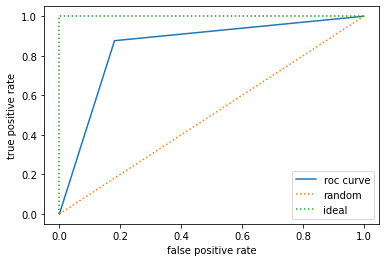

[2. 1. 0.]


In [258]:
# ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）
fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_hat)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
print(thresholds)

In [259]:
# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_true, y_score=y_hat)
print("AUC:", auc_score)

AUC: 0.8476270885175968


#  予測する

In [260]:
y_predict = model(X_vat).data
print(y_predict)
y_predict = y_predict.round().numpy()
df_out = pd.DataFrame(np.array(y_predict ,dtype=np.int32), columns=['val'])

df_out.to_csv('./submit.csv', encoding='utf_8_sig' , header=False)


tensor([[0.9944],
        [0.9996],
        [0.9917],
        [0.9939],
        [0.9366],
        [0.9994],
        [1.0000],
        [0.9197],
        [0.9997],
        [0.9998],
        [0.9993],
        [0.9562],
        [0.9998],
        [1.0000],
        [0.9904],
        [0.9999],
        [0.9998],
        [0.9979],
        [0.9827],
        [0.9904],
        [0.9918],
        [0.9374],
        [0.9996],
        [0.9984],
        [0.9761],
        [0.9986],
        [0.9983],
        [0.9997],
        [0.9996],
        [1.0000],
        [0.9935],
        [1.0000],
        [0.9928],
        [0.9908],
        [1.0000],
        [1.0000],
        [0.9372],
        [0.9949],
        [0.9916],
        [0.9999],
        [0.9976],
        [0.9338],
        [1.0000],
        [0.9997],
        [0.7599],
        [0.9926],
        [0.9927],
        [1.0000],
        [0.9995],
        [0.9999],
        [0.9998],
        [0.9933],
        [0.9999],
        [0.9969],
        [0.9997],
        [0

# モデルの保存

In [249]:
#model_path = 'model.pth'
#torch.save(model.to('cpu').state_dict(), model_path)